## TCGA Dataset - The Cancer Genome Atlas Program

The file to analyse 4e2f3a20-e8a2-4711-995a-c97261572dc3.rna_seq.augmented_star_gene_counts.tsv is a gene expression quantification file from RNA-Seq data.
It contains gene counts data from the TARGET-AML project. The data is from a primary blood-derived cancer bone marrow sample, processed using the STAR-Counts workflow.

The reference genome used was GRCh38.p0

Research datasets found on https://www.cancer.gov/ccg/access-data


In [39]:
# Reading the metadata from a JSON file
import pandas as pd
import json
import os
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Go up one directory level and then into the data folder
file_path = os.path.join('..', 'data', 'b11b5fbe-8e5e-402d-9a14-cd2656beb88c_history.2024-10-05.json')

try:
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    print("File contents:")
    print(json.dumps(data, indent=2))

    for item in data:
        print(item)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except json.JSONDecodeError:
    print(f"Error: The file '{file_path}' does not contain valid JSON.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


File contents:
[
  {
    "uuid": "b11b5fbe-8e5e-402d-9a14-cd2656beb88c",
    "version": "1",
    "file_change": "released",
    "release_date": "2022-09-28",
    "data_release": "35.0"
  }
]
{'uuid': 'b11b5fbe-8e5e-402d-9a14-cd2656beb88c', 'version': '1', 'file_change': 'released', 'release_date': '2022-09-28', 'data_release': '35.0'}


In [44]:
file_path = os.path.join('..', 'data', 'c97261572dc3.rna_seq.augmented_star_gene_counts.tsv')

df = pd.read_csv(file_path, sep='\t', header=0, skiprows=1)
numeric_columns = ['unstranded', 'stranded_first', 'stranded_second', 'tpm_unstranded', 'fpkm_unstranded', 'fpkm_uq_unstranded']

# Applying conversion to numeric, forcing non-numeric values to NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Delete rows with NaN in the gene_name column
df.dropna(subset=['gene_name'], inplace=True)
print(df.head())


              gene_id gene_name       gene_type  unstranded  stranded_first  \
4  ENSG00000000003.15    TSPAN6  protein_coding           3               1   
5   ENSG00000000005.6      TNMD  protein_coding           0               0   
6  ENSG00000000419.13      DPM1  protein_coding         358               3   
7  ENSG00000000457.14     SCYL3  protein_coding         759             249   
8  ENSG00000000460.17  C1orf112  protein_coding         434             172   

   stranded_second  tpm_unstranded  fpkm_unstranded  fpkm_uq_unstranded  
4                2          0.0807           0.0225              0.0212  
5                0          0.0000           0.0000              0.0000  
6              360         36.2052          10.0711              9.5158  
7              797         13.4604           3.7442              3.5378  
8              566          8.8738           2.4684              2.3323  


# Variables in the dataset
    gene_id: A unique identifier for each gene (ENSG).
    gene_name: Name of the gene (e.g., TSPAN6, TNMD).
    gene_type: The type of gene (e.g., protein-coding, pseudogene, lncRNA).
    Expression Quantifications:
        unstranded: Gene expression counts without strand-specific information.
        stranded_first: Gene expression counts from the first strand.
        stranded_second: Gene expression counts from the second strand.
        tpm_unstranded: Transcripts Per Million (TPM) measure for unstranded reads.
        fpkm_unstranded: Fragments Per Kilobase of transcript per Million mapped reads (FPKM).
        fpkm_uq_unstranded: Upper quartile normalized FPKM.

In [45]:
print("\nDataFrame info:")
print(df.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 60660 entries, 4 to 60663
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gene_id             60660 non-null  object 
 1   gene_name           60660 non-null  object 
 2   gene_type           60660 non-null  object 
 3   unstranded          60660 non-null  int64  
 4   stranded_first      60660 non-null  int64  
 5   stranded_second     60660 non-null  int64  
 6   tpm_unstranded      60660 non-null  float64
 7   fpkm_unstranded     60660 non-null  float64
 8   fpkm_uq_unstranded  60660 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.6+ MB
None


In [46]:
print("\nStats for numeric columns:")
print(df.describe())
print(f"\nNon-null count for each column: from a total of 60675 rows (in %) \n{df.count()/60675 * 100}")



Stats for numeric columns:
          unstranded  stranded_first  stranded_second  tpm_unstranded  \
count   60660.000000    60660.000000     60660.000000    60660.000000   
mean      523.527465       43.070986       531.010320       16.485328   
std      3634.349052      332.399391      3686.687441      483.287058   
min         0.000000        0.000000         0.000000        0.000000   
25%         0.000000        0.000000         0.000000        0.000000   
50%         3.000000        1.000000         1.000000        0.419500   
75%        68.000000        7.000000        37.000000        6.385675   
max    537940.000000    29292.000000    537366.000000   116154.570100   

       fpkm_unstranded  fpkm_uq_unstranded  
count     60660.000000        60660.000000  
mean          4.585677            4.332844  
std         134.434597          127.022487  
min           0.000000            0.000000  
25%           0.000000            0.000000  
50%           0.116700            0.110200  

In [34]:
# Count number of different types of gene types
print("\nCount of different types of gene types:")
print(df['gene_type'].value_counts())


Count of different types of gene types:
gene_type
protein_coding                        19962
lncRNA                                16901
processed_pseudogene                  10167
unprocessed_pseudogene                 2614
misc_RNA                               2212
snRNA                                  1901
miRNA                                  1881
TEC                                    1057
snoRNA                                  943
transcribed_unprocessed_pseudogene      939
transcribed_processed_pseudogene        500
rRNA_pseudogene                         497
IG_V_pseudogene                         187
IG_V_gene                               145
transcribed_unitary_pseudogene          138
TR_V_gene                               106
unitary_pseudogene                       98
TR_J_gene                                79
scaRNA                                   49
polymorphic_pseudogene                   48
rRNA                                     47
IG_D_gene                

# Class and Goal Definition

Class 1: Protein-coding and Regulatory RNAs

    protein_coding
    lncRNA (long non-coding RNA)
    miRNA (microRNA)
    misc_RNA
    snRNA (small nuclear RNA)
    snoRNA (small nucleolar RNA)
    scaRNA (small Cajal body-specific RNA)

Class 2: Pseudogenes and Immunoglobulin/T-cell Receptor Genes

    processed_pseudogene
    unprocessed_pseudogene
    transcribed_unprocessed_pseudogene
    transcribed_processed_pseudogene
    unitary_pseudogene
    IG_V_pseudogene
    IG_V_gene
    TR_V_gene
    TR_J_gene
    IG_D_gene

Rationale for this grouping:

    Class 1 focuses on protein-coding genes and regulatory RNAs, which are often directly involved in gene expression regulation and cellular processes. In leukemia research, these gene types are crucial for understanding:
        Altered gene expression patterns in leukemic cells
        Dysregulation of key signaling pathways
        Potential therapeutic targets
        miRNA-mediated regulation of leukemia-associated genes
    Class 2 includes pseudogenes and immunoglobulin/T-cell receptor genes, which can provide insights into:
        Genomic instability in leukemic cells
        Potential biomarkers for leukemia subtypes
        Immune system involvement in leukemia progression and treatment response
        Clonal evolution of leukemic cells


Goals:
1. Identify correlations between protein-coding genes and regulatory RNAs that may be involved in leukemogenesis -> uncover novel relationships between different gene types in leukemia.
2. Explore the relationship between immunoglobulin/T-cell receptor gene expression and leukemia subtypes or treatment outcomes.

In [47]:
# Class 1: Protein-coding and Regulatory RNAs
class1_gene_types = ['protein_coding', 'lncRNA', 'miRNA', 'misc_RNA', 'snRNA', 'snoRNA', 'scaRNA']
    
# Class 2: Pseudogenes and Immunoglobulin/T-cell Receptor Genes
class2_gene_types = [
    'processed_pseudogene', 'unprocessed_pseudogene', 'transcribed_unprocessed_pseudogene',
    'transcribed_processed_pseudogene', 'unitary_pseudogene', 'IG_V_pseudogene', 'IG_V_gene',
    'TR_V_gene', 'TR_J_gene', 'IG_D_gene'
]

In [48]:
class1_df = df[df['gene_type'].isin(class1_gene_types)]
class2_df = df[df['gene_type'].isin(class2_gene_types)]

class1_expression = class1_df[['unstranded', 'stranded_first', 'stranded_second']].fillna(0)
class2_expression = class2_df[['unstranded', 'stranded_first', 'stranded_second']].fillna(0)


# Step 1: standardize the data (should center as well but TODO according to paper's formula)
scaler = StandardScaler()
class1_scaled = scaler.fit_transform(class1_expression)
class2_scaled = scaler.fit_transform(class2_expression)


In [50]:
class1_df = pd.DataFrame(class1_scaled)
class2_df = pd.DataFrame(class2_scaled)

# Find the minimum number of rows between the two classes
min_samples = min(class1_df.shape[0], class2_df.shape[0])

# Slice both DataFrames to have the same number of samples (rows)
class1_df = class1_df.iloc[:min_samples, :]
class2_df = class2_df.iloc[:min_samples, :]

In [51]:
# Canonical Correlation Analysis
cca = CCA(n_components=2)
class1_cca, class2_cca = cca.fit_transform(class1_df, class2_df)

print("Canonical Correlation Coefficients for Class 1:\n", class1_cca[:5])
print("\nCanonical Correlation Coefficients for Class 2:\n", class2_cca[:5])

Canonical Correlation Coefficients for Class 1:
 [[-0.06835357 -0.06569601]
 [-0.06846627 -0.06492798]
 [-0.05125238 -0.05779175]
 [-0.07563731 -0.01969776]
 [-0.09115132  0.05200357]]

Canonical Correlation Coefficients for Class 2:
 [[ 0.10330177 -0.0060199 ]
 [ 0.07305129  0.00591962]
 [ 0.09995982 -0.00806752]
 [-0.09007191 -0.09636265]
 [ 0.09828884 -0.00909134]]


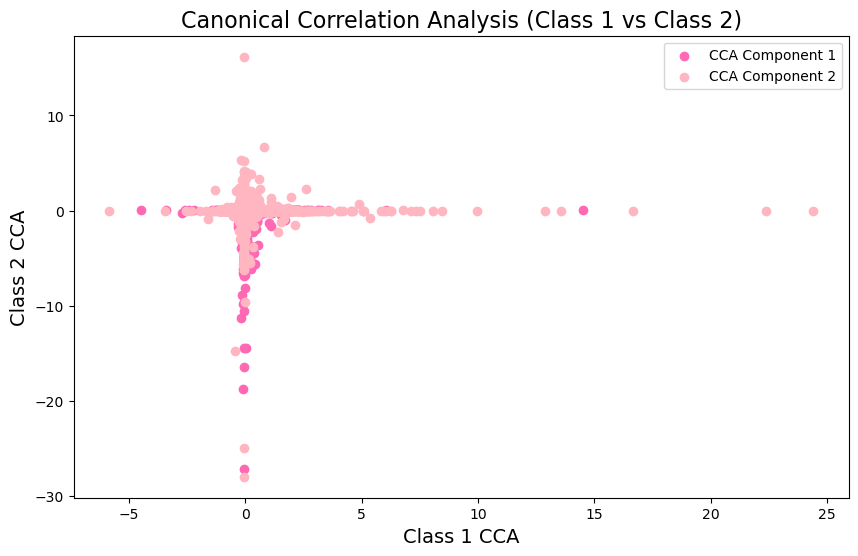

In [52]:
plt.figure(figsize=(10, 6))

# Plot CCA Component 1 (hotpink)
plt.scatter(class1_cca[:, 0], class2_cca[:, 0], label="CCA Component 1", color='hotpink')

# Plot CCA Component 2 (lightpink)
plt.scatter(class1_cca[:, 1], class2_cca[:, 1], label="CCA Component 2", color='lightpink')

plt.title('Canonical Correlation Analysis (Class 1 vs Class 2)', fontsize=16)
plt.xlabel('Protein-coding and Regulatory RNAs', fontsize=14)
plt.ylabel('Pseudogenes and Immunoglobulin/T-cell Receptor Genes', fontsize=14)

plt.legend()
plt.show()